![alt text](./image_files/pageheader_rose2_babies.jpg)

# Data Science in Medicine using Python

### Author: Dr Gusztav Belteki

### 1. Import required libraries and modules and set options

In [1]:
# It is good practice to do it as a first thing in the Notebook

# Standard library modules
import datetime
import sys
import os

# External data science libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set options
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = 'w'
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Check and record the version the packages and modules you are using

print(f'Python version: {sys.version}')
print(f'numPy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {mpl.__version__}')

Python version: 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]
numPy version: 1.19.2
pandas version: 1.1.3
matplotlib version: 3.3.2


### 2. Import the preprocessed data from pickle archives

##### "Computer programs are for human to read and occasionally for computers to run"

You want to be more verbose particularly when learning Python

In [3]:
import pickle

with open(os.path.join('data_dict.pickle'), 'rb') as handle:
    data_dict = pickle.load(handle)

In [4]:
data_dict.keys()

dict_keys(['2019-01-16_090910.423', '2020-11-02_134238.904', '2019-01-14_124200.144'])

In [5]:
data_dict['2019-01-16_090910.423']

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],RRspon [1/min],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-16 09:09:11,1.547630e+12,0.0,0.19,0.20,0.19,91.9,0.0,80.3,0.19,6.9,3.0,0.97,0.0,5.2,8.3,5.5,65.0,14.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.20,27.0,65.0,1.0,1.3,46.0,0.0,4589.0,0.02,0.15,0.66,3.0,3.0,14.0,0.00,0.330435,0.347826,0.330435,0.0,0.330435,5.217391,0.0,0.0,0.0,5.217391,0.0,5.217391,5.217391,0.347826,0.0,5.217391,5.217391,0.000000
2019-01-16 09:09:12,1.547630e+12,1.0,0.19,0.20,0.22,85.0,0.0,73.5,0.19,6.9,3.0,0.99,0.0,5.2,8.3,5.5,65.0,14.0,0.0,0.0,3.0,0.0,3.1,3.0,0.0,0.0,0.0,0.20,28.0,65.0,1.0,1.3,46.0,0.0,4076.0,0.02,0.14,0.66,3.0,3.2,14.0,0.00,0.330435,0.347826,0.382609,0.0,0.330435,5.217391,0.0,0.0,0.0,5.217391,0.0,5.391304,5.217391,0.347826,0.0,5.217391,5.565217,0.000000
2019-01-16 09:09:13,1.547630e+12,2.0,0.19,0.20,0.18,85.0,0.0,73.5,0.19,6.9,4.2,0.99,0.0,5.1,8.5,5.4,65.0,14.0,0.0,0.0,4.1,0.0,3.3,4.2,0.0,0.0,0.0,0.20,28.0,65.0,1.0,1.2,46.0,0.0,5564.0,0.01,0.19,0.66,4.1,3.3,14.0,0.00,0.330435,0.347826,0.313043,0.0,0.330435,7.304348,0.0,0.0,0.0,7.130435,0.0,5.739130,7.304348,0.347826,0.0,7.130435,5.739130,0.000000
2019-01-16 09:09:14,1.547630e+12,3.0,0.19,0.20,0.18,85.0,0.0,73.5,0.19,6.9,3.1,0.99,0.0,5.0,8.5,5.6,65.0,12.0,0.0,0.0,3.1,0.0,4.0,3.1,0.0,0.0,0.0,0.20,29.0,65.0,1.0,1.2,46.0,0.0,6321.0,0.01,0.17,0.64,3.1,4.0,12.0,0.00,0.330435,0.347826,0.313043,0.0,0.330435,5.391304,0.0,0.0,0.0,5.391304,0.0,6.956522,5.391304,0.347826,0.0,5.391304,6.956522,0.000000
2019-01-16 09:09:15,1.547630e+12,4.0,0.19,0.20,0.25,80.8,0.0,68.4,0.19,6.9,2.9,0.92,0.0,5.1,8.4,5.5,65.0,12.0,0.0,0.0,2.9,0.0,3.2,2.9,0.0,0.0,0.0,0.20,29.0,65.0,1.0,1.2,46.0,0.0,3970.0,0.02,0.17,0.64,2.9,3.2,12.0,0.00,0.330435,0.347826,0.434783,0.0,0.330435,5.043478,0.0,0.0,0.0,5.043478,0.0,5.565217,5.043478,0.347826,0.0,5.043478,5.565217,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-17 13:19:49,1.547731e+12,101438.0,0.17,0.18,0.22,162.0,0.0,151.0,0.17,7.0,2.7,1.00,0.0,5.0,8.5,5.0,60.0,17.0,0.0,0.0,2.7,0.0,2.7,2.7,0.0,0.0,0.0,0.17,0.0,60.0,1.0,2.0,37.0,0.0,4216.0,0.04,0.10,0.67,2.7,2.9,17.0,0.01,0.295652,0.313043,0.382609,0.0,0.295652,4.695652,0.0,0.0,0.0,4.695652,0.0,4.695652,4.695652,0.295652,0.0,4.695652,5.043478,0.017391
2019-01-17 13:19:50,1.547731e+12,101439.0,0.17,0.17,0.26,213.0,0.0,202.0,0.17,7.0,2.4,0.94,0.0,5.1,8.5,5.3,60.0,17.0,0.0,0.0,2.3,0.0,3.2,2.4,0.0,0.0,0.0,0.17,0.0,60.0,1.0,2.0,37.0,0.0,3864.0,0.04,0.12,0.62,2.3,3.2,17.0,0.00,0.295652,0.295652,0.452174,0.0,0.295652,4.173913,0.0,0.0,0.0,4.000000,0.0,5.565217,4.173913,0.295652,0.0,4.000000,5.565217,0.000000
2019-01-17 13:19:51,1.547731e+12,101440.0,0.17,0.17,0.21,213.0,0.0,202.0,0.17,7.0,3.0,0.94,0.0,5.1,8.6,5.2,60.0,18.0,0.0,0.0,3.0,0.0,2.8,3.0,0.0,0.0,0.0,0.17,0.0,60.0,1.0,2.0,37.0,0.0,4681.0,0.05,0.12,0.62,3.0,2.8,18.0,0.00,0.295652,0.295652,0.365217,0.0,0.295652,5.217391,0.0,0.0,0.0,5.217391,0.0,4.869565,5.217391,0.295652,0.0,5.217391,4.869565,0.000000


### 3. Compare ventilator parameters with the settings

#### First we have to load the settings

In [43]:
# From the files in 'Data' sub-directory only consider those ones which contain 'slow_Measurement'
flist = [fle for fle in os.listdir('data') if 'slow_Setting' in fle]

setting_dict = {} # Creates an empty dictionary

for file in flist: # Loop through all relevant data files
    
    # The relative filepath to the files
    path = os.path.join('data', file,)
    
    # Use the specific part of the filename as a unique key for the dictionary
    tag = file[11:-17] # you need to adjust the indices as the filename are of different length
    
    # Import data, parse the 'Date' and 'Time' columns as datetime and combine them
    setting_dict[tag] = pd.read_csv(path, parse_dates = [['Date', 'Time']])
    
    # Set the combined 'Date_Time' column as row index 
    setting_dict[tag] = setting_dict[tag].set_index('Date_Time')

In [44]:
setting_dict.keys()

dict_keys(['2019-01-14_124200.144', '2019-01-16_090910.423', '2020-11-02_134238.904'])

In [45]:
setting_dict['2019-01-14_124200.144'].head(25)

,Time [ms],Rel.Time [s],Id,Name,Unit,Value Old,Value New
Date_Time,,,,,,,
2019-01-14 12:42:01.066,1547469721066,0,FiO2,FiO2,%,NaN,24.000
2019-01-14 12:42:01.066,1547469721066,0,VTi,VTi,L,NaN,0.003
2019-01-14 12:42:01.066,1547469721066,0,Ti,Ti,s,NaN,0.320
2019-01-14 12:42:01.066,1547469721066,0,Te,Te,s,NaN,0.880
2019-01-14 12:42:01.066,1547469721066,0,I (I:E),I (I:E),no unit,NaN,1.000
2019-01-14 12:42:01.066,1547469721066,0,E (I:E),E (I:E),no unit,NaN,2.700
2019-01-14 12:42:01.066,1547469721066,0,RR,RR,1/min,NaN,50.000
2019-01-14 12:42:01.066,1547469721066,0,PEEP,PEEP,mbar,NaN,6.000
2019-01-14 12:42:01.066,1547469721066,0,Pmax,Pmax,mbar,NaN,30.000


- `Id` and `Name` columnns are dupolicates, one of them needs to be removed. 

- `Name` and `Unit` should be combined into a single column

In [46]:
# Remove the duplicate column
for tag in setting_dict:
    setting_dict[tag] = setting_dict[tag].drop('Id', axis = 1)

In [47]:
setting_dict['2019-01-14_124200.144'].head(25)

,Time [ms],Rel.Time [s],Name,Unit,Value Old,Value New
Date_Time,,,,,,
2019-01-14 12:42:01.066,1547469721066,0,FiO2,%,NaN,24.000
2019-01-14 12:42:01.066,1547469721066,0,VTi,L,NaN,0.003
2019-01-14 12:42:01.066,1547469721066,0,Ti,s,NaN,0.320
2019-01-14 12:42:01.066,1547469721066,0,Te,s,NaN,0.880
2019-01-14 12:42:01.066,1547469721066,0,I (I:E),no unit,NaN,1.000
2019-01-14 12:42:01.066,1547469721066,0,E (I:E),no unit,NaN,2.700
2019-01-14 12:42:01.066,1547469721066,0,RR,1/min,NaN,50.000
2019-01-14 12:42:01.066,1547469721066,0,PEEP,mbar,NaN,6.000
2019-01-14 12:42:01.066,1547469721066,0,Pmax,mbar,NaN,30.000


In [48]:
for tag in setting_dict:
    setting_dict[tag]['correct_name'] = setting_dict[tag]['Name'] +  ' ' + '['+ setting_dict[tag]['Unit'] + ']'

Google: _to combine two text columns in pandas_

Top hit: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe


In [49]:
for tag in setting_dict:
    data = setting_dict[tag]
    data['Name'] = data[['Name', 'Unit']].agg(' '.join, axis = 1)

In [50]:
setting_dict['2019-01-14_124200.144'].head(25)

,Time [ms],Rel.Time [s],Name,Unit,Value Old,Value New,correct_name
Date_Time,,,,,,,
2019-01-14 12:42:01.066,1547469721066,0,FiO2 %,%,NaN,24.000,FiO2 [%]
2019-01-14 12:42:01.066,1547469721066,0,VTi L,L,NaN,0.003,VTi [L]
2019-01-14 12:42:01.066,1547469721066,0,Ti s,s,NaN,0.320,Ti [s]
2019-01-14 12:42:01.066,1547469721066,0,Te s,s,NaN,0.880,Te [s]
2019-01-14 12:42:01.066,1547469721066,0,I (I:E) no unit,no unit,NaN,1.000,I (I:E) [no unit]
2019-01-14 12:42:01.066,1547469721066,0,E (I:E) no unit,no unit,NaN,2.700,E (I:E) [no unit]
2019-01-14 12:42:01.066,1547469721066,0,RR 1/min,1/min,NaN,50.000,RR [1/min]
2019-01-14 12:42:01.066,1547469721066,0,PEEP mbar,mbar,NaN,6.000,PEEP [mbar]
2019-01-14 12:42:01.066,1547469721066,0,Pmax mbar,mbar,NaN,30.000,Pmax [mbar]


That is better but still not what we really want. We would like `FiO2 [%]` not only `FiO2 %` as this is how parameters are shown in the other table

There is no vectorised function to this...

Let us step back to user defined functions

In [51]:
# Reminder

def addition(a, b):
    print (f'arguments: {a}, {b}') # side effect of the function
    c = a + b
    return c # This is the return value of the function

In [52]:
y = addition(15, 16)

arguments: 15, 16


In [53]:
y

31

In [54]:
def text_converter(a):
    b = a.split() 
    print(f'b = {b}')
    c = b[:-1]
    print(f'c = {c}')
    d =  ' '.join(c)
    print(f'd = {d}')
    e = a.split()[-1]
    print(e)
    f = '[' + e + ']'
    print(f)
    g = d + ' ' + f
    print(g)
    return g

In [55]:
x = 'Flow trigger L/min'
y = text_converter(x)

b = ['Flow', 'trigger', 'L/min']
c = ['Flow', 'trigger']
d = Flow trigger
L/min
[L/min]
Flow trigger [L/min]


In [56]:
y

'Flow trigger [L/min]'

In [62]:
def text_converter_no_print(a):
    b = a.split() 
    c = b[:-1]
    d =  ' '.join(c)
    e = a.split()[-1]
    f = '[' + e + ']'
    g = d + ' ' + f
    return g

SyntaxError: invalid syntax (<ipython-input-62-a3c0faf763c2>, line 1)

In [58]:
def text_converter_terse(a):
    return ' '.join(a.split()[:-1]) + ' [' + a.split()[-1] + ']'

In [64]:
d = text_converter_terse(setting_dict['2019-01-14_124200.144']['Name'])

AttributeError: 'Series' object has no attribute 'split'

In [59]:
for tag in setting_dict:
    data = setting_dict[tag]
    data['Name'] = data['Name'].apply(text_converter_no_print)

In [60]:
setting_dict.keys()

dict_keys(['2019-01-14_124200.144', '2019-01-16_090910.423', '2020-11-02_134238.904'])

In [65]:
setting_dict['2019-01-14_124200.144'].head(25)

,Time [ms],Rel.Time [s],Name,Unit,Value Old,Value New,correct_name
Date_Time,,,,,,,
2019-01-14 12:42:01.066,1547469721066,0,FiO2 [%],%,NaN,24.000,FiO2 [%]
2019-01-14 12:42:01.066,1547469721066,0,VTi [L],L,NaN,0.003,VTi [L]
2019-01-14 12:42:01.066,1547469721066,0,Ti [s],s,NaN,0.320,Ti [s]
2019-01-14 12:42:01.066,1547469721066,0,Te [s],s,NaN,0.880,Te [s]
2019-01-14 12:42:01.066,1547469721066,0,I (I:E) no [unit],no unit,NaN,1.000,I (I:E) [no unit]
2019-01-14 12:42:01.066,1547469721066,0,E (I:E) no [unit],no unit,NaN,2.700,E (I:E) [no unit]
2019-01-14 12:42:01.066,1547469721066,0,RR [1/min],1/min,NaN,50.000,RR [1/min]
2019-01-14 12:42:01.066,1547469721066,0,PEEP [mbar],mbar,NaN,6.000,PEEP [mbar]
2019-01-14 12:42:01.066,1547469721066,0,Pmax [mbar],mbar,NaN,30.000,Pmax [mbar]


Please note that the data are in a long format, you have to convert it first

#### Pivot the name columns

In [95]:
setting_dict_pivoted = {}

for tag in setting_dict:
    setting_dict_pivoted[tag] = setting_dict[tag].pivot(columns = 'Name', values = 'Value New')

In [96]:
setting_dict_pivoted['2019-01-14_124200.144'].head(20)

Name,E (I:E) no [unit],FiO2 [%],Flow trigger [L/min],I (I:E) no [unit],MVhigh delay [s],MVlow delay [s],PEEP [mbar],Pmax [mbar],RR [1/min],Slope [s],Te [s],Ti [s],VTi [L],VTi [mL]
Date_Time,,,,,,,,,,,,,,
2019-01-14 12:42:01.066,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 13:15:10.060,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 13:23:13.082,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 16:04:19.107,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 16:56:37.062,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 18:38:49.068,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 19:51:57.083,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 19:52:44.067,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 20:00:57.109,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Fill down the missing values

for tag in setting_dict:
    setting_dict_pivoted[tag] = setting_dict_pivoted[tag].fillna(method = 'ffill')

In [98]:
setting_dict_pivoted['2019-01-14_124200.144'].head(10)

Name,E (I:E) no [unit],FiO2 [%],Flow trigger [L/min],I (I:E) no [unit],MVhigh delay [s],MVlow delay [s],PEEP [mbar],Pmax [mbar],RR [1/min],Slope [s],Te [s],Ti [s],VTi [L],VTi [mL]
Date_Time,,,,,,,,,,,,,,
2019-01-14 12:42:01.066,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 13:15:10.060,2.7,25.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 13:23:13.082,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 16:04:19.107,2.7,27.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 16:56:37.062,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 18:38:49.068,2.7,22.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 19:51:57.083,2.7,25.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 19:52:44.067,2.7,27.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9
2019-01-14 20:00:57.109,2.7,26.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,0.003,2.9


In [99]:
# The `VTi ['L'] column is unnecessary, remove it

for tag in setting_dict_pivoted:
    setting_dict_pivoted[tag] = setting_dict_pivoted[tag].drop('VTi [L]', axis = 1)

In [100]:
# The VTi name is misleading because it is actually a target expired VT. It also needs to be normalised 
# to body weight

# Weights in kilogram
weights = {'2019-01-14_124200.144' : 0.575, '2019-01-16_090910.423' : 0.575 , '2020-11-02_134238.904' : 775}

for tag in setting_dict_pivoted:
    setting_dict_pivoted[tag]['VTe_set [mL/kg]'] = setting_dict_pivoted[tag]['VTi [mL]'] / weights[tag]
    setting_dict_pivoted[tag] = setting_dict_pivoted[tag].drop('VTi [mL]', axis = 1)

In [101]:
setting_dict_pivoted['2019-01-14_124200.144'].head(10)

Name,E (I:E) no [unit],FiO2 [%],Flow trigger [L/min],I (I:E) no [unit],MVhigh delay [s],MVlow delay [s],PEEP [mbar],Pmax [mbar],RR [1/min],Slope [s],Te [s],Ti [s],VTe_set [mL/kg]
Date_Time,,,,,,,,,,,,,
2019-01-14 12:42:01.066,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 13:15:10.060,2.7,25.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 13:23:13.082,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 16:04:19.107,2.7,27.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 16:56:37.062,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 18:38:49.068,2.7,22.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 19:51:57.083,2.7,25.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 19:52:44.067,2.7,27.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 20:00:57.109,2.7,26.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478


In [109]:
setting_dict_pivoted['2019-01-14_124200.144'].resample('1S').mean().reindex(data_dict['2019-01-14_124200.144'].index)

Name,E (I:E) no [unit],FiO2 [%],Flow trigger [L/min],I (I:E) no [unit],MVhigh delay [s],MVlow delay [s],PEEP [mbar],Pmax [mbar],RR [1/min],Slope [s],Te [s],Ti [s],VTe_set [mL/kg]
Date_Time,,,,,,,,,,,,,
2019-01-14 12:42:01,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 12:42:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 12:42:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 12:42:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 17:50:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15 17:50:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15 17:50:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
data_dict['2019-01-14_124200.144'].head()

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar],RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min],I (I:E) [no unit],E (I:E) [no unit],FiO2 [%],VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],RRspon [1/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-14 12:42:01,1.547470e+12,0.0,0.15,0.13,0.29,142.0,0.0,129.0,0.15,6.5,2.7,0.97,0.0,6.0,8.4,6.1,50.0,16.0,0.0,0.0,2.7,0.0,2.4,2.7,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3393.0,0.04,0.11,0.58,2.7,2.4,16.0,0.0,NaN,0.26087,0.226087,0.504348,0.0,0.26087,4.695652,0.0,0.0,0.0,4.695652,0.0,4.173913,4.695652,0.26087,0.0,4.695652,4.173913,0.0
2019-01-14 12:42:02,1.547470e+12,1.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,2.8,0.97,0.0,5.9,8.4,6.1,50.0,16.0,0.0,0.0,2.8,0.0,2.6,2.8,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3393.0,0.04,0.11,0.66,2.8,2.6,16.0,0.0,NaN,0.26087,0.226087,0.504348,0.0,0.26087,4.869565,0.0,0.0,0.0,4.869565,0.0,4.521739,4.869565,0.26087,0.0,4.869565,4.521739,0.0
2019-01-14 12:42:03,1.547470e+12,2.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,2.8,0.97,0.0,5.8,8.5,6.1,50.0,16.0,0.0,0.0,2.8,0.0,2.6,2.8,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3429.0,0.04,0.11,0.66,2.8,2.6,16.0,0.0,NaN,0.26087,0.226087,0.504348,0.0,0.26087,4.869565,0.0,0.0,0.0,4.869565,0.0,4.521739,4.869565,0.26087,0.0,4.869565,4.521739,0.0
2019-01-14 12:42:04,1.547470e+12,3.0,0.15,0.13,0.27,152.0,0.0,139.0,0.15,6.5,2.9,0.97,0.0,5.8,8.5,6.0,50.0,16.0,0.0,0.0,2.9,0.0,2.4,2.9,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3754.0,0.04,0.11,0.66,2.9,2.4,16.0,0.0,NaN,0.26087,0.226087,0.469565,0.0,0.26087,5.043478,0.0,0.0,0.0,5.043478,0.0,4.173913,5.043478,0.26087,0.0,5.043478,4.173913,0.0
2019-01-14 12:42:05,1.547470e+12,4.0,0.15,0.13,0.27,143.0,0.0,129.0,0.15,6.5,2.9,0.98,0.0,5.8,8.5,6.0,50.0,16.0,0.0,0.0,2.9,0.0,2.4,2.9,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3528.0,0.04,0.11,0.62,2.8,2.6,16.0,0.0,NaN,0.26087,0.226087,0.469565,0.0,0.26087,5.043478,0.0,0.0,0.0,5.043478,0.0,4.173913,5.043478,0.26087,0.0,4.869565,4.521739,0.0


#### Combine the two DataFrames

In [106]:
data_all = {}

for tag in data_dict:
    data_all[tag] = pd.merge(data_dict[tag], setting_dict_pivoted[tag], how = 'outer', 
                             left_index = True, right_index = True)
    data_all[tag] = data_all[tag].ffill()

In [107]:
data_all['2019-01-14_124200.144'].head(10)

,Time [ms],Rel.Time [s],MVe [L/min],MVi [L/min],Cdyn [L/bar],R [mbar/L/s],MVespon [L/min],Rpat [mbar/L/s],MVemand [L/min],FlowDev [L/min],VTmand [mL],r2 [no unit],VTispon [mL],Pmin [mbar],Pmean [mbar],PEEP [mbar]_x,RRmand [1/min],PIP [mbar],VTmand [L],VTspon [L],VTemand [mL],VTespon [mL],VTimand [mL],VT [mL],% leak [%],% MVspon [%],MV [L/min],RRtrig [1/min],RR [1/min]_x,I (I:E) [no unit],E (I:E) [no unit],FiO2 [%]_x,VTspon [mL],E [mbar/L],TC [s],TCe [s],C20/Cdyn [no unit],VTe [mL],VTi [mL],EIP [mbar],MVleak [L/min],RRspon [1/min],MVe [L/min/kg],MVi [L/min/kg],Cdyn [L/bar/kg],MVespon [L/min/kg],MVemand [L/min/kg],VTmand [mL/kg],VTispon [mL/kg],VTmand [L/kg],VTspon [L/kg],VTemand [mL/kg],VTespon [mL/kg],VTimand [mL/kg],VT [mL/kg],MV [L/min/kg],VTspon [mL/kg],VTe [mL/kg],VTi [mL/kg],MVleak [L/min/kg],E (I:E) no [unit],FiO2 [%]_y,Flow trigger [L/min],I (I:E) no [unit],MVhigh delay [s],MVlow delay [s],PEEP [mbar]_y,Pmax [mbar],RR [1/min]_y,Slope [s],Te [s],Ti [s],VTe_set [mL/kg]
Date_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-14 12:42:01.000,1.547470e+12,0.0,0.15,0.13,0.29,142.0,0.0,129.0,0.15,6.5,2.7,0.97,0.0,6.0,8.4,6.1,50.0,16.0,0.0,0.0,2.7,0.0,2.4,2.7,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3393.0,0.04,0.11,0.58,2.7,2.4,16.0,0.0,NaN,0.260870,0.226087,0.504348,0.0,0.260870,4.695652,0.0,0.0,0.0,4.695652,0.0,4.173913,4.695652,0.26087,0.0,4.695652,4.173913,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-14 12:42:01.066,1.547470e+12,0.0,0.15,0.13,0.29,142.0,0.0,129.0,0.15,6.5,2.7,0.97,0.0,6.0,8.4,6.1,50.0,16.0,0.0,0.0,2.7,0.0,2.4,2.7,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3393.0,0.04,0.11,0.58,2.7,2.4,16.0,0.0,NaN,0.260870,0.226087,0.504348,0.0,0.260870,4.695652,0.0,0.0,0.0,4.695652,0.0,4.173913,4.695652,0.26087,0.0,4.695652,4.173913,0.0,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:02.000,1.547470e+12,1.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,2.8,0.97,0.0,5.9,8.4,6.1,50.0,16.0,0.0,0.0,2.8,0.0,2.6,2.8,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3393.0,0.04,0.11,0.66,2.8,2.6,16.0,0.0,NaN,0.260870,0.226087,0.504348,0.0,0.260870,4.869565,0.0,0.0,0.0,4.869565,0.0,4.521739,4.869565,0.26087,0.0,4.869565,4.521739,0.0,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:03.000,1.547470e+12,2.0,0.15,0.13,0.29,152.0,0.0,139.0,0.15,6.5,2.8,0.97,0.0,5.8,8.5,6.1,50.0,16.0,0.0,0.0,2.8,0.0,2.6,2.8,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3429.0,0.04,0.11,0.66,2.8,2.6,16.0,0.0,NaN,0.260870,0.226087,0.504348,0.0,0.260870,4.869565,0.0,0.0,0.0,4.869565,0.0,4.521739,4.869565,0.26087,0.0,4.869565,4.521739,0.0,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:04.000,1.547470e+12,3.0,0.15,0.13,0.27,152.0,0.0,139.0,0.15,6.5,2.9,0.97,0.0,5.8,8.5,6.0,50.0,16.0,0.0,0.0,2.9,0.0,2.4,2.9,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3754.0,0.04,0.11,0.66,2.9,2.4,16.0,0.0,NaN,0.260870,0.226087,0.469565,0.0,0.260870,5.043478,0.0,0.0,0.0,5.043478,0.0,4.173913,5.043478,0.26087,0.0,5.043478,4.173913,0.0,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:05.000,1.547470e+12,4.0,0.15,0.13,0.27,143.0,0.0,129.0,0.15,6.5,2.9,0.98,0.0,5.8,8.5,6.0,50.0,16.0,0.0,0.0,2.9,0.0,2.4,2.9,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3528.0,0.04,0.11,0.62,2.8,2.6,16.0,0.0,NaN,0.260870,0.226087,0.469565,0.0,0.260870,5.043478,0.0,0.0,0.0,5.043478,0.0,4.173913,5.043478,0.26087,0.0,4.869565,4.521739,0.0,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:06.000,1.547470e+12,5.0,0.15,0.13,0.28,143.0,0.0,129.0,0.15,6.5,2.8,0.98,0.0,5.8,8.6,6.1,50.0,16.0,0.0,0.0,2.8,0.0,2.6,2.8,0.0,0.0,0.15,0.0,50.0,1.0,2.7,24.0,0.0,3718.0,0.04,0.11,0.62,2.8,2.6,16.0,0.0,NaN,0.260870,0.226087,0.486957,0.0,0.260870,4.869565,0.0,0.0,0.0,4.869565,0.0,4.521739,4.869565,0.26087,0.0,4.869565,4.521739,0.0,2.7,24.0,0.2,1.0,5.0,0.0,6.0,30.0,50.0,0.08,0.88,0.32,5.043478
2019-01-14 12:42:07.000,1.547470e+12,6.0,0.15,0.13,0.29,143.0,

In [86]:
data_all['2019-01-14_124200.144'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104999 entries, 2019-01-14 12:42:01 to 2019-01-15 17:50:54
Data columns (total 73 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time [ms]             104999 non-null  float64
 1   Rel.Time [s]          104999 non-null  float64
 2   MVe [L/min]           104999 non-null  float64
 3   MVi [L/min]           104999 non-null  float64
 4   Cdyn [L/bar]          104999 non-null  float64
 5   R [mbar/L/s]          104999 non-null  float64
 6   MVespon [L/min]       104999 non-null  float64
 7   Rpat [mbar/L/s]       104999 non-null  float64
 8   MVemand [L/min]       104999 non-null  float64
 9   FlowDev [L/min]       104999 non-null  float64
 10  VTmand [mL]           104999 non-null  float64
 11  r2 [no unit]          104999 non-null  float64
 12  VTispon [mL]          104999 non-null  float64
 13  Pmin [mbar]           104999 non-null  float64
 14  Pmean [mbar]      

In [87]:
pd.merge?

In [88]:
data_all['2019-01-14_124200.144'].columns

Index(['Time [ms]', 'Rel.Time [s]', 'MVe [L/min]', 'MVi [L/min]',
       'Cdyn [L/bar]', 'R [mbar/L/s]', 'MVespon [L/min]', 'Rpat [mbar/L/s]',
       'MVemand [L/min]', 'FlowDev [L/min]', 'VTmand [mL]', 'r2 [no unit]',
       'VTispon [mL]', 'Pmin [mbar]', 'Pmean [mbar]', 'PEEP [mbar]_x',
       'RRmand [1/min]', 'PIP [mbar]', 'VTmand [L]', 'VTspon [L]',
       'VTemand [mL]', 'VTespon [mL]', 'VTimand [mL]', 'VT [mL]', '% leak [%]',
       '% MVspon [%]', 'MV [L/min]', 'RRtrig [1/min]', 'RR [1/min]_x',
       'I (I:E) [no unit]', 'E (I:E) [no unit]', 'FiO2 [%]_x', 'VTspon [mL]',
       'E [mbar/L]', 'TC [s]', 'TCe [s]', 'C20/Cdyn [no unit]', 'VTe [mL]',
       'VTi [mL]', 'EIP [mbar]', 'MVleak [L/min]', 'RRspon [1/min]',
       'MVe [L/min/kg]', 'MVi [L/min/kg]', 'Cdyn [L/bar/kg]',
       'MVespon [L/min/kg]', 'MVemand [L/min/kg]', 'VTmand [mL/kg]',
       'VTispon [mL/kg]', 'VTmand [L/kg]', 'VTspon [L/kg]', 'VTemand [mL/kg]',
       'VTespon [mL/kg]', 'VTimand [mL/kg]', 'VT [mL/kg]', 

In [ ]:
data_all['2019-01-14_124200.144'][['VTmand [mL/kg]','VTe_set [mL/kg]']].head(20)

In [110]:
(data_dict['2019-01-14_124200.144']['VTmand [mL/kg]'] - \
    setting_dict_pivoted['2019-01-14_124200.144']['VTe_set [mL/kg]'])[:100]

Date_Time
2019-01-14 12:42:01.000   NaN
2019-01-14 12:42:01.066   NaN
2019-01-14 12:42:02.000   NaN
2019-01-14 12:42:03.000   NaN
2019-01-14 12:42:04.000   NaN
2019-01-14 12:42:05.000   NaN
2019-01-14 12:42:06.000   NaN
2019-01-14 12:42:07.000   NaN
2019-01-14 12:42:08.000   NaN
2019-01-14 12:42:09.000   NaN
2019-01-14 12:42:10.000   NaN
2019-01-14 12:42:11.000   NaN
2019-01-14 12:42:12.000   NaN
2019-01-14 12:42:13.000   NaN
2019-01-14 12:42:14.000   NaN
2019-01-14 12:42:15.000   NaN
2019-01-14 12:42:16.000   NaN
2019-01-14 12:42:17.000   NaN
2019-01-14 12:42:18.000   NaN
2019-01-14 12:42:19.000   NaN
2019-01-14 12:42:20.000   NaN
2019-01-14 12:42:21.000   NaN
2019-01-14 12:42:22.000   NaN
2019-01-14 12:42:23.000   NaN
2019-01-14 12:42:24.000   NaN
2019-01-14 12:42:25.000   NaN
2019-01-14 12:42:26.000   NaN
2019-01-14 12:42:27.000   NaN
2019-01-14 12:42:28.000   NaN
2019-01-14 12:42:29.000   NaN
2019-01-14 12:42:30.000   NaN
2019-01-14 12:42:31.000   NaN
2019-01-14 12:42:32.000   NaN


In [111]:
for tag in data_dict:
    data_all[tag]['VTdiff [mL/kg]'] = data_all[tag]['VTmand [mL/kg]'] - data_all[tag]['VTe_set [mL/kg]']

In [112]:
data_all['2019-01-14_124200.144'][['VTmand [mL/kg]','VTe_set [mL/kg]', 'VTdiff [mL/kg]']].head(20)

,VTmand [mL/kg],VTe_set [mL/kg],VTdiff [mL/kg]
Date_Time,,,
2019-01-14 12:42:01.000,4.695652,NaN,NaN
2019-01-14 12:42:01.066,4.695652,5.043478,-0.347826
2019-01-14 12:42:02.000,4.869565,5.043478,-0.173913
2019-01-14 12:42:03.000,4.869565,5.043478,-0.173913
2019-01-14 12:42:04.000,5.043478,5.043478,0.000000
2019-01-14 12:42:05.000,5.043478,5.043478,0.000000
2019-01-14 12:42:06.000,4.869565,5.043478,-0.173913
2019-01-14 12:42:07.000,5.217391,5.043478,0.173913
2019-01-14 12:42:08.000,5.217391,5.043478,0.173913


In [113]:
for tag in data_dict:
    data_all[tag]['VTdiff [mL/kg]'] = np.abs(data_all[tag]['VTmand [mL/kg]'] - data_all[tag]['VTe_set [mL/kg]'])

In [114]:
data_all['2019-01-14_124200.144'][['VTmand [mL/kg]','VTe_set [mL/kg]', 'VTdiff [mL/kg]']].head(20)

,VTmand [mL/kg],VTe_set [mL/kg],VTdiff [mL/kg]
Date_Time,,,
2019-01-14 12:42:01.000,4.695652,NaN,NaN
2019-01-14 12:42:01.066,4.695652,5.043478,0.347826
2019-01-14 12:42:02.000,4.869565,5.043478,0.173913
2019-01-14 12:42:03.000,4.869565,5.043478,0.173913
2019-01-14 12:42:04.000,5.043478,5.043478,0.000000
2019-01-14 12:42:05.000,5.043478,5.043478,0.000000
2019-01-14 12:42:06.000,4.869565,5.043478,0.173913
2019-01-14 12:42:07.000,5.217391,5.043478,0.173913
2019-01-14 12:42:08.000,5.217391,5.043478,0.173913


In [115]:
data_all['2019-01-14_124200.144']['VTdiff [mL/kg]'].describe()

count    104998.000000
mean          0.887421
std           1.637583
min           0.000000
25%           0.173913
50%           0.347826
75%           0.869565
max          53.217391
Name: VTdiff [mL/kg], dtype: float64

<AxesSubplot:>

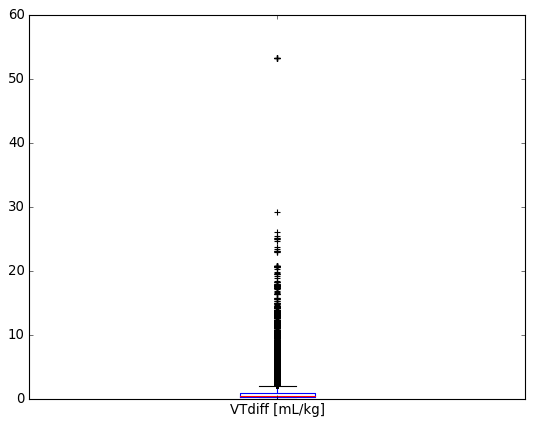

In [116]:
data_all['2019-01-14_124200.144']['VTdiff [mL/kg]'].plot(kind = 'box')

<AxesSubplot:>

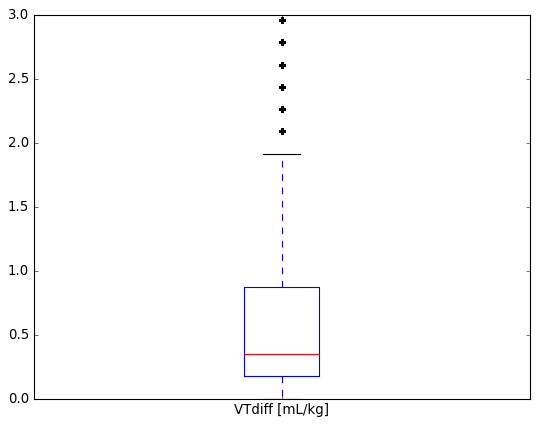

In [117]:
data_all['2019-01-14_124200.144']['VTdiff [mL/kg]'].plot(kind = 'box', ylim = [0,3])